# Final Project : Dimension Reduction and Classification using Restricted Boltzmann Machine on the MNIST Dataset: An Experimental Replication

**Course Name:** Statistical machine learning

**Experiment Name:** experiment of using Restricted Boltzmann Machine (RBM) for dimension reduction and classification on the MNIST dataset

**Major:** Software engineering

**Class:** Master

**Student Name:** Abdelhamid HADILI

**Student ID:** 2022124967

**Date:** 2023/05/29

# **1. Import needed libraries :**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

np.random.seed(0)

ModuleNotFoundError: No module named 'tensorflow'

# **2. Loading DATA :**

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **3. Visualise a sample of the DATA :**

<ipython-input-4-e1486a3bb186>:33: UserWarning: You passed a edgecolor/edgecolors ('m') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_tsne[y_train_subset == i, 0],
<ipython-input-4-e1486a3bb186>:33: UserWarning: You passed a edgecolor/edgecolors ('y') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_tsne[y_train_subset == i, 0],
<ipython-input-4-e1486a3bb186>:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_tsne[y_train_subset == i, 0],
<ipython-input-4-e1486a3bb186>:33: UserWarning: You passed a edgecolor/edgecolors ('purple') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  T

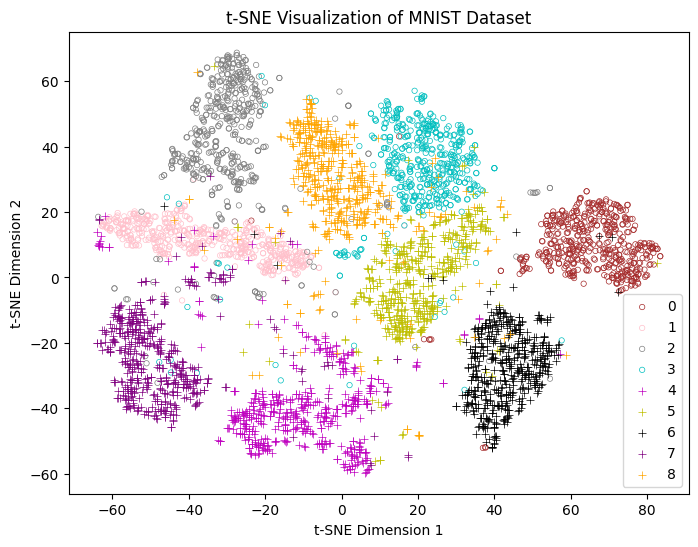

In [4]:
# Flatten the image data into a 1D array
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Select a subset of samples (500 digits per class)
subset_indices = np.concatenate(
    [np.where(y_train == i)[0][:500] for i in range(10)])
x_train_subset = x_train_flat[subset_indices]
y_train_subset = y_train[subset_indices]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train_subset)

colors = ['brown', 'pink', 'gray', 'c', 'm',
          'y', 'k', 'purple', 'orange']

plt.figure(figsize=(8, 6))

for i in range(9):
    if i < 4:
        marker = 'o' 
        facecolor = 'none'  
        edgecolor = colors[i]  
        label = f'{i}'
        size = 15  
    else:
        marker = '+'  
        edgecolor = colors[i]  
        facecolor = edgecolor  
        label = f'{i}'
        size = 30  
        
    plt.scatter(x_tsne[y_train_subset == i, 0],
                x_tsne[y_train_subset == i, 1],
                marker=marker,linewidth = 0.5,
                facecolor=facecolor, edgecolor=edgecolor,
                label=label, s=size)


plt.legend()
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


plt.show()



<ipython-input-6-36c64508dd2f>:31: UserWarning: You passed a edgecolor/edgecolors ('m') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_pca_subset[y_train_subset == i, 0],
<ipython-input-6-36c64508dd2f>:31: UserWarning: You passed a edgecolor/edgecolors ('y') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_pca_subset[y_train_subset == i, 0],
<ipython-input-6-36c64508dd2f>:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_pca_subset[y_train_subset == i, 0],
<ipython-input-6-36c64508dd2f>:31: UserWarning: You passed a edgecolor/edgecolors ('purple') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of

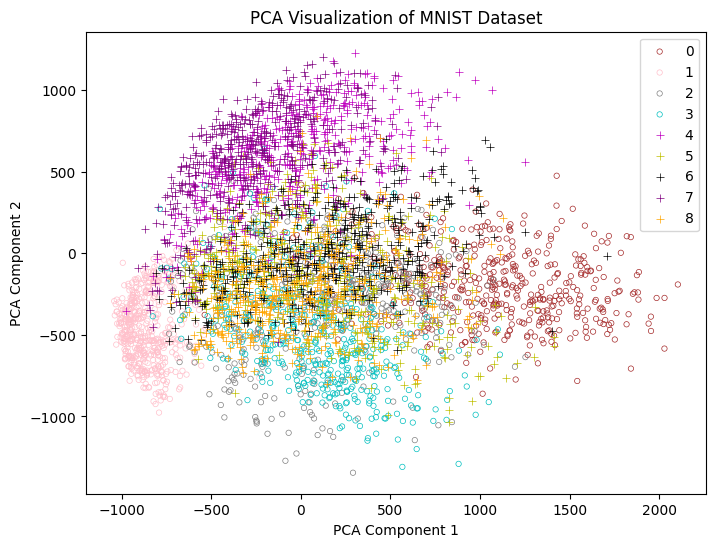

In [6]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_train_flat)

# Select a subset of samples (500 digits per class)
subset_indices = np.concatenate(
    [np.where(y_train == i)[0][:500] for i in range(10)])
x_pca_subset = x_pca[subset_indices]
y_train_subset = y_train[subset_indices]

colors = ['brown', 'pink', 'gray', 'c', 'm',
          'y', 'k', 'purple', 'orange']

plt.figure(figsize=(8, 6))

for i in range(9):
    if i < 4:
        marker = 'o'
        facecolor = 'none'
        edgecolor = colors[i]
        label = f'{i}'
        size = 15
    else:
        marker = '+'
        edgecolor = colors[i]
        facecolor = edgecolor
        label = f'{i}'
        size = 30

    plt.scatter(x_pca_subset[y_train_subset == i, 0],
                x_pca_subset[y_train_subset == i, 1],
                marker=marker, linewidth=0.5,
                facecolor=facecolor, edgecolor=edgecolor,
                label=label, s=size)

plt.legend()
plt.title('PCA Visualization of MNIST Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

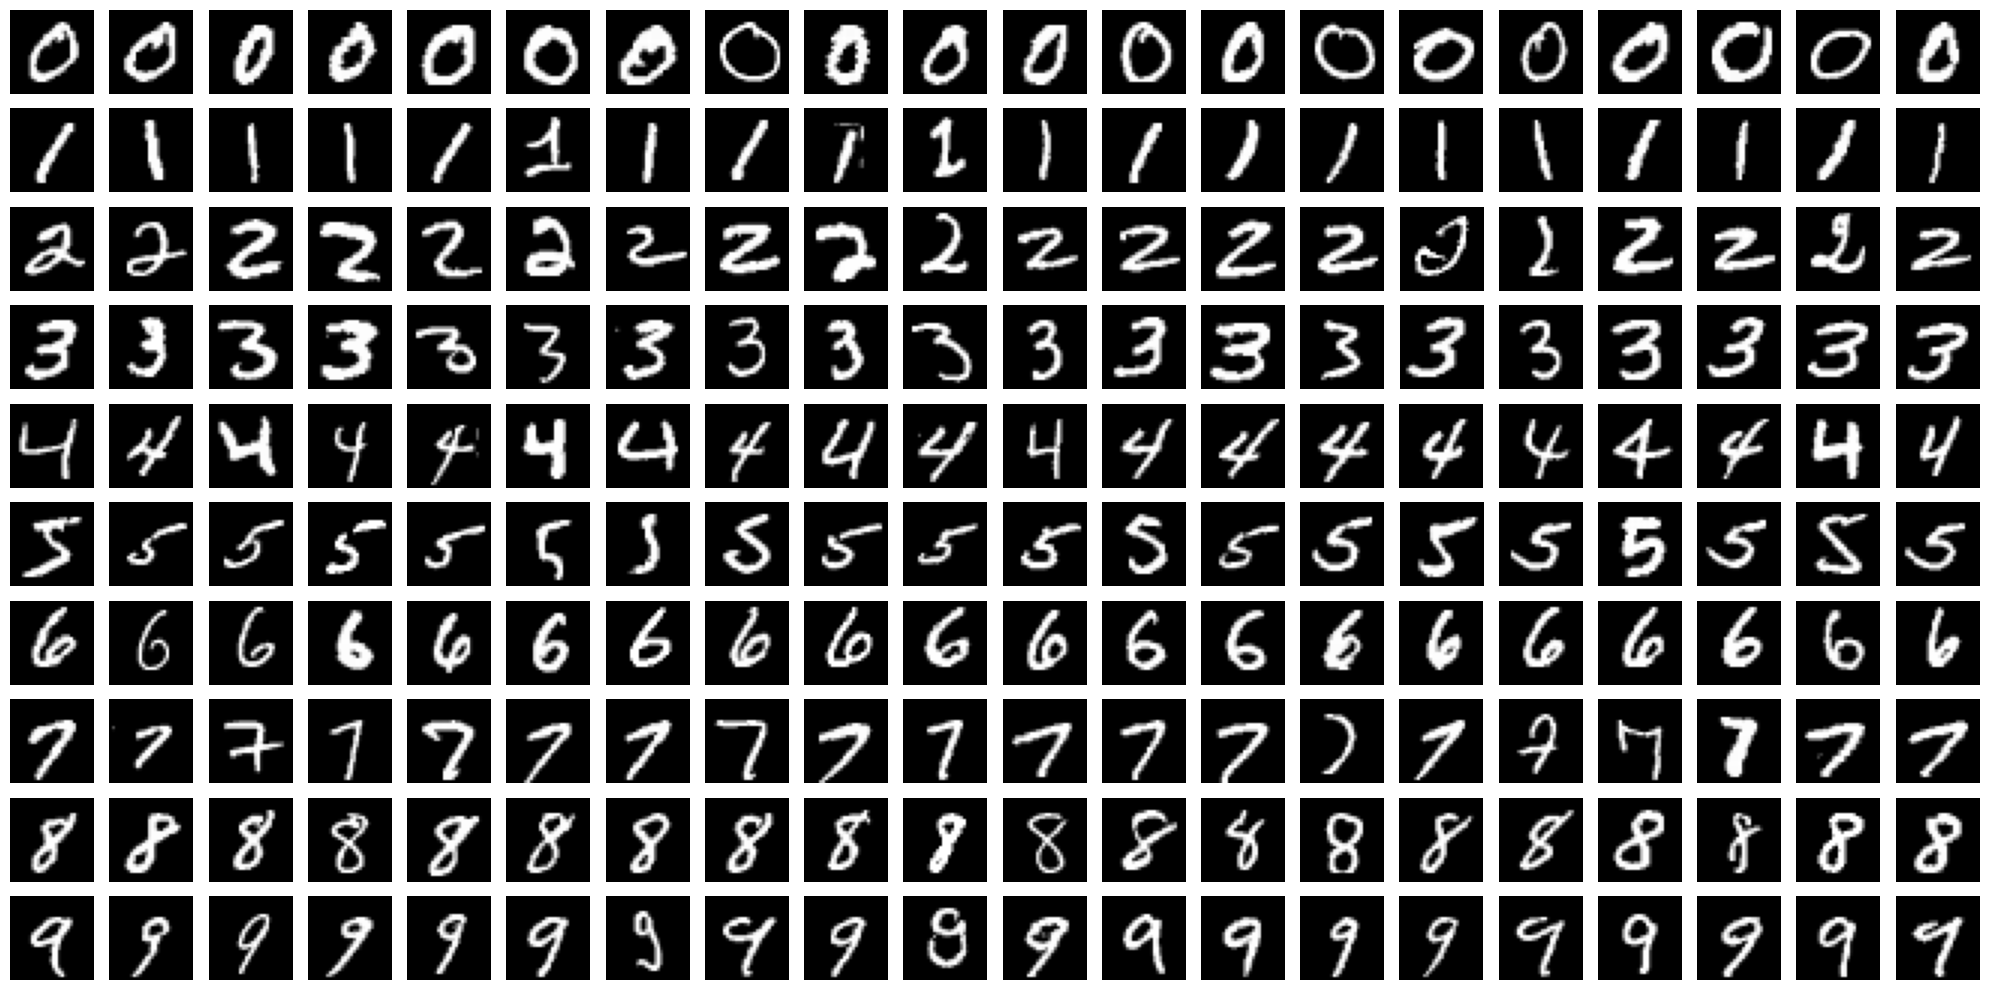

In [7]:
subset_indices = np.concatenate(
    [np.where(y_train == i)[0][:20] for i in range(10)])
x_train_subset = x_train_flat[subset_indices]
y_train_subset = y_train[subset_indices]


fig, axs = plt.subplots(10, 20, figsize=(20, 10))


for i in range(10):
    class_samples = x_train_subset[y_train_subset == i]
    for j in range(20):
        axs[i, j].imshow(class_samples[j].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')


plt.tight_layout()

plt.show()

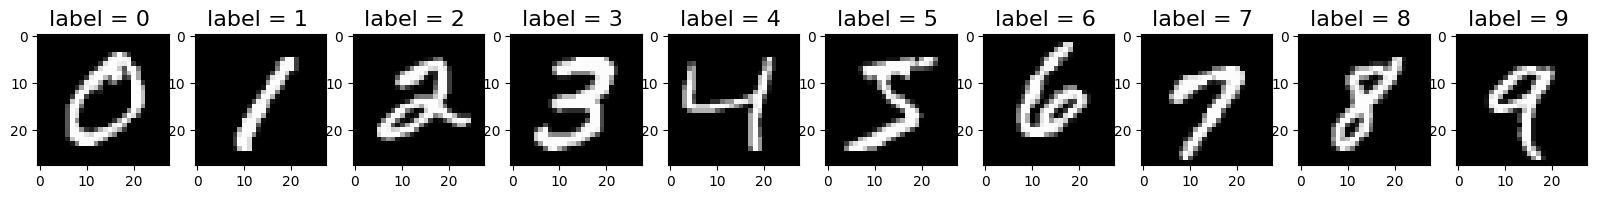

In [30]:
num_classes = 10
f, ax = plt.subplots(1,num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("label = {} ".format(i), fontsize=16)

# 4.	Visualize the feature distribution.

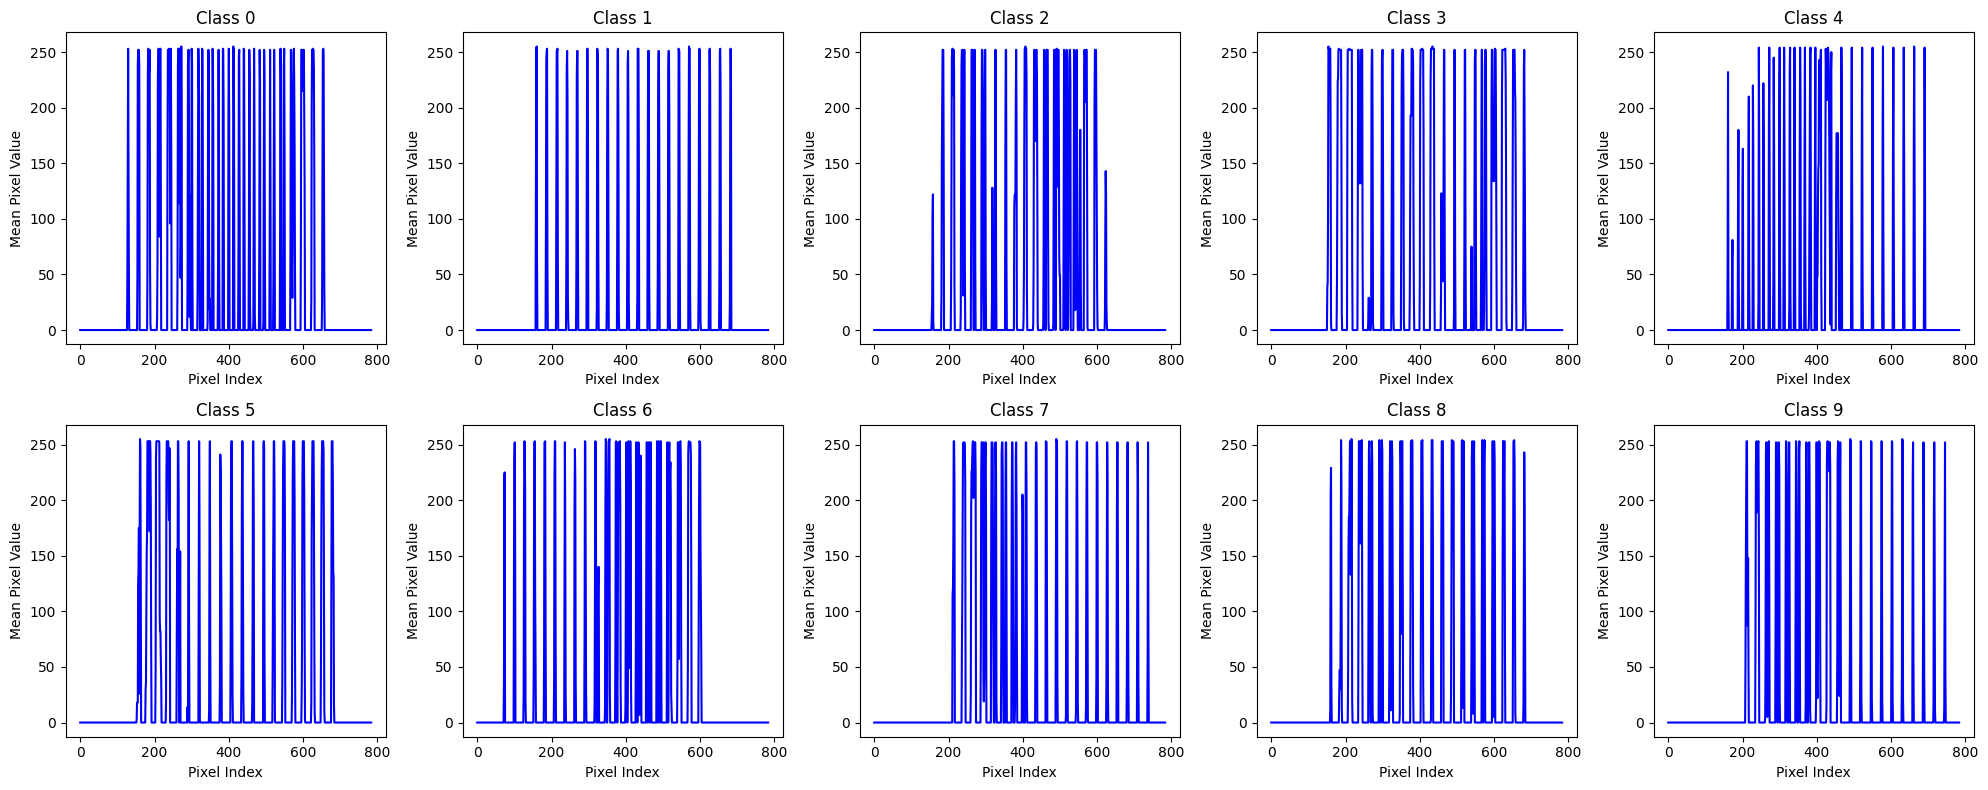

In [43]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

for i in range(num_classes):
    class_samples = x_train_subset[i * num_samples_per_class: (i + 1) * num_samples_per_class]
    feature_distribution = np.mean(class_samples, axis=0)
    axs[i].plot(feature_distribution, color='blue')
    axs[i].set_title("Class {}".format(i), fontsize=12)
    axs[i].set_xlabel("Pixel Index", fontsize=10)
    axs[i].set_ylabel("Mean Pixel Value", fontsize=10)

plt.tight_layout()
plt.show()



In [31]:
for i in range(num_classes):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [32]:
#make each of the 10 values as a class
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [33]:
for i in range(num_classes):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# **5. Data preparation :** 

In [44]:
# normalize data (limit the data range to ([0, 1]))
x_train = x_train / 255.0
x_test = x_test / 255.0

In [45]:
# reshape the data into a vector
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train.shape

(60000, 784)

# **6. Create the model :**

In [46]:
model = Sequential()
model.add(Dense(units =128, input_shape=(784,),
                activation = 'relu'))
model.add(Dense(units =128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units =10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# **7. Training the model :**

In [47]:
batch_size = 512
epochs = 60
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
                    epochs=epochs, verbose=0)

Epoch 1/60
118/118 [==============================] - 3s 13ms/step - loss: 0.5722 - accuracy: 0.8341
Epoch 2/60
118/118 [==============================] - 4s 30ms/step - loss: 0.2280 - accuracy: 0.9337
Epoch 3/60
118/118 [==============================] - 3s 21ms/step - loss: 0.1683 - accuracy: 0.9497
Epoch 4/60
118/118 [==============================] - 2s 20ms/step - loss: 0.1333 - accuracy: 0.9607
Epoch 5/60
118/118 [==============================] - 3s 22ms/step - loss: 0.1093 - accuracy: 0.9669
Epoch 6/60
118/118 [==============================] - 2s 17ms/step - loss: 0.0914 - accuracy: 0.9735
Epoch 7/60
118/118 [==============================] - 1s 12ms/step - loss: 0.0801 - accuracy: 0.9756
Epoch 8/60
118/118 [==============================] - 2s 18ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 9/60
118/118 [==============================] - 2s 13ms/step - loss: 0.0599 - accuracy: 0.9821
Epoch 10/60
118/118 [==============================] - 1s 11ms/step - loss: 0.0544 - accura

# **8. Evaluating the model :**

In [48]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss : {test_loss}, Test Accuracy : {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1487 - accuracy: 0.9783
Test Loss : 0.14872866868972778, Test Accuracy : 0.9782999753952026


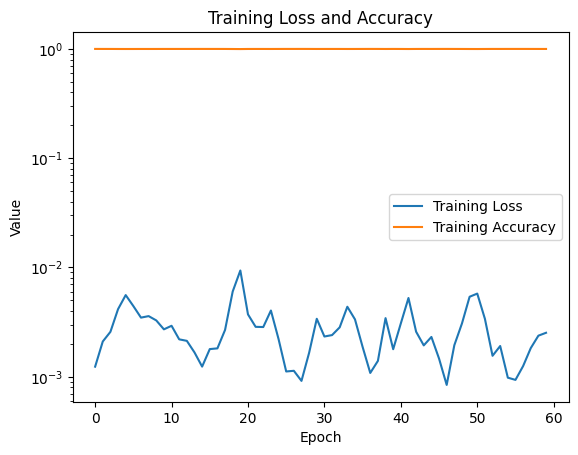

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.yscale('log')  
plt.legend()
plt.show()

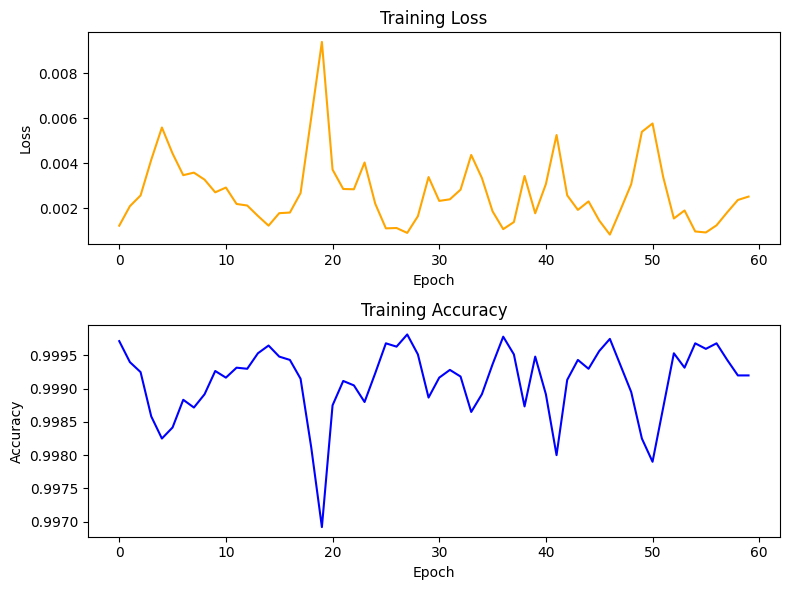

In [50]:

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(history.history['loss'],color='orange')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')

axs[1].plot(history.history['accuracy'], color='blue')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()

plt.show()

## 8.1 Predict the classificating of an input image :


In [51]:
y_predict = model.predict(x_test)
y_predict_classes = np.argmax(y_predict,axis = 1)
print(y_predict)
print(y_predict_classes)

313/313 [==============================] - 1s 2ms/step
[[2.6286877e-21 5.3519113e-19 4.0093711e-21 ... 9.9999994e-01
  9.0933475e-21 3.7997746e-15]
 [4.5434314e-24 1.5037530e-20 9.9999994e-01 ... 2.7594437e-24
  1.1447845e-21 1.5015381e-38]
 [9.2156202e-14 9.9999982e-01 2.8479415e-11 ... 3.1378937e-09
  6.3499769e-08 9.1701706e-18]
 ...
 [5.7056132e-24 2.0550036e-19 2.2698559e-32 ... 3.2347169e-17
  2.2429833e-17 7.9390298e-14]
 [8.6576457e-31 6.3893853e-28 8.5916671e-34 ... 2.1680767e-25
  2.7824694e-14 6.0003959e-35]
 [5.2430729e-19 1.1922927e-27 3.9021103e-25 ... 4.9488804e-33
  5.9731907e-22 2.5097264e-37]]
[7 2 1 ... 4 5 6]


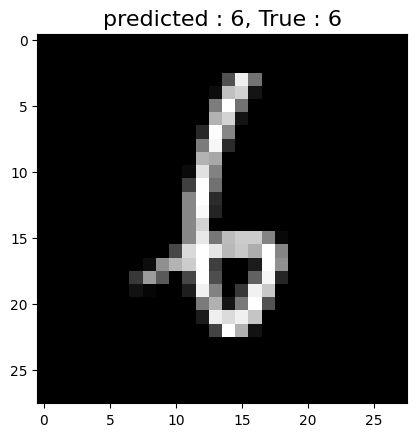

In [52]:
random_idx= np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_predict_class = y_predict_classes[random_idx]

plt.title(f"predicted : {y_sample_predict_class}, True : {y_sample_true}",
          fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap="gray")

## 8.2 Confusion Matrix : 

Showing how accurate our model for each class.

Text(0.5, 1.0, 'Confusion Matrix')

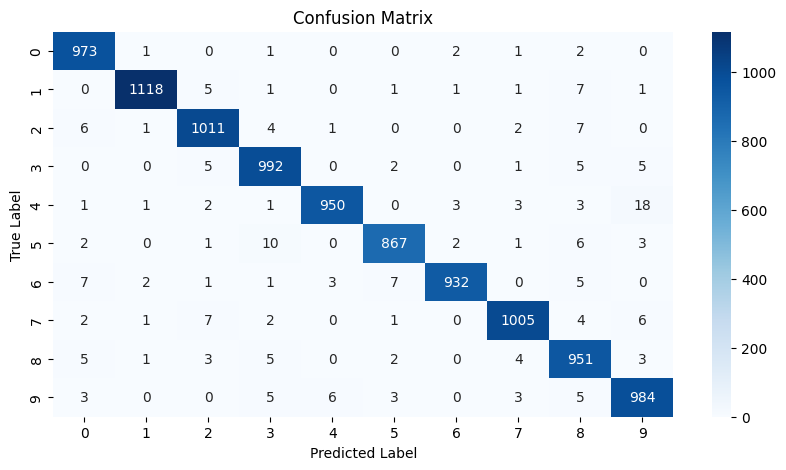

In [53]:
confusion_mtx = confusion_matrix(y_true, y_predict_classes)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_mtx, annot = True, fmt='d',ax=ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

## 8.3 Error investigation :

Finding the values where the pridicted classes are not the same as the true classes
 

In [54]:
errors = (y_predict_classes - y_true != 0)
y_predict_classes_errors = y_predict_classes[errors]
y_predict_errors = y_predict[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

Finding the values where the algorithm is the least certain of the correct prediction

In [55]:
y_predict_errors_probability = np.max(y_predict_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_predict_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_predict_errors_probability - true_probability_errors

Getting the list of indices of sorted differences


In [56]:
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

Displaying the errors


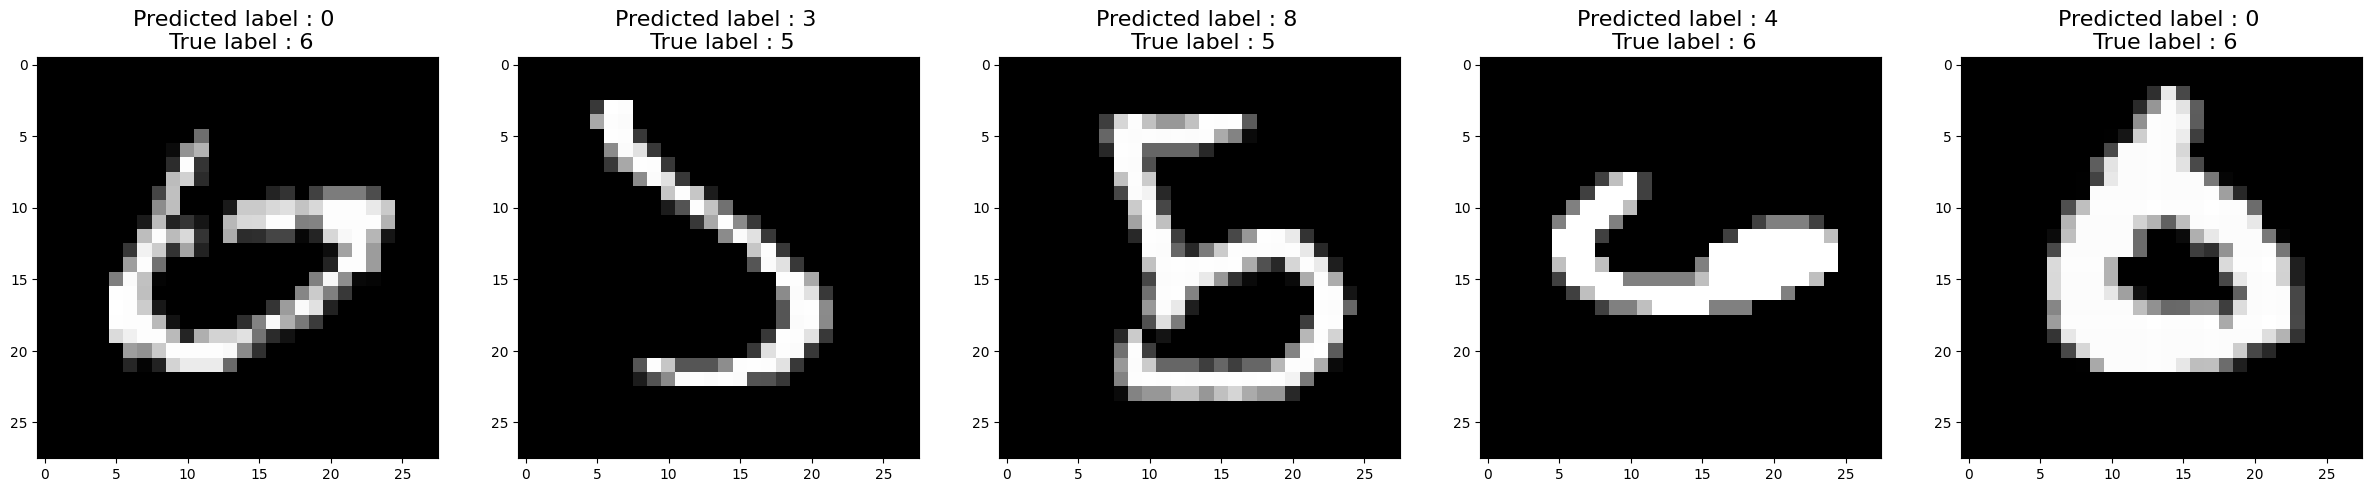

In [57]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1,num,figsize=(30,30))

for i in range(0,num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_predict_classes_errors[idx]
  ax[i].set_title(f"Predicted label : {y_p} \n True label : {y_t}", fontsize = 16)
  ax[i].imshow(sample, cmap = "gray")